# **Describe Data:**

https://www.kaggle.com/c/petfinder-adoption-prediction/data

**Problem:**

predict the speed at which a pet is adopted, based on the pet’s listing on PetFinder. Sometimes a profile represents a group of pets. In this case, the speed of adoption is determined by the speed at which all of the pets are adopted. 

**The data included text, tabular, and image data.**

## **Data Fields:**

**PetID** - Unique hash ID of pet profile

**AdoptionSpeed** - Categorical speed of adoption. Lower is faster. **This is the 
value to predict.**

**Type** - Type of animal (1 = Dog, 2 = Cat)

**Name** - Name of pet (Empty if not named)

**Age** - Age of pet when listed, in months

**Breed1** - Primary breed of pet (Refer to BreedLabels dictionary)

**Breed2** - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels 
dictionary)

**Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents 
group of pets)

**Color1** - Color 1 of pet (Refer to ColorLabels dictionary)

**Color2** - Color 2 of pet (Refer to ColorLabels dictionary)

**Color3** - Color 3 of pet (Refer to ColorLabels dictionary)

**MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra 

Large, 0 = Not Specified)

**FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

**Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

**Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)

**Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

**Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 
= Not Specified)

**Quantity** - Number of pets represented in profile

**Fee** - Adoption fee (0 = Free)

**State** - State location in Malaysia (Refer to StateLabels dictionary)

**RescuerID** - Unique hash ID of rescuer

**VideoAmt** - Total uploaded videos for this pet

**PhotoAmt** - Total uploaded photos for this pet

**Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

## **AdoptionSpeed**

The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the 
following way:

**0** - Pet was adopted on the same day as it was listed.

**1** - Pet was adopted between 1 and 7 days (1st week) after being listed.

**2** - Pet was adopted between 8 and 30 days (1st month) after being listed.

**3** - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

**4** - No adoption after 100 days of being listed. (There are no pets in this 
dataset that waited between 90 and 100 days).






Evaluation criteria:
- Use of tabular data = 50% of the mark 
- Use of text data (Pet Description) or Image Data = 75% of the mark 

- Use of ALL sources = Tabular+Image+Text+Sentiment = 100% of the mark 


Bonus:
- Submission to Kaggle on official Leaderboard = +5
- Top 15% score = +10
- Top 5% score = +20
- Top 3% score = +30

# **Get Data:**

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 61kB/s 


In [ ]:
import os

In [ ]:


# Install Kaggle API
!pip install --quiet kaggle


if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle

# !mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_json/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

############################################
!sudo apt-get install p7zip-full

cp: cannot stat '/content/drive/MyDrive/Kaggle_json/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
#! kaggle competitions download -c petfinder-adoption-prediction

In [ ]:
#!unzip /content/drive/MyDrive/Datasets/p2/train_images.zip

In [ ]:
#!unzip /content/drive/MyDrive/Datasets/p2/train_images.zip
#!unzip /content/drive/MyDrive/Datasets/p2/test_images.zip

# **Import Needed Library**

In [ ]:
#libraries
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
from catboost import CatBoostClassifier
from tqdm import tqdm_notebook
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import random
import warnings
warnings.filterwarnings("ignore")
from functools import partial
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)
import os
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.metrics import confusion_matrix as sk_cmatrix

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.ensemble import RandomForestClassifier
#import langdetect
#import eli5
from IPython.display import display 

from sklearn.metrics import cohen_kappa_score
def kappa(y_true, y_pred):
  return cohen_kappa_score(y_true, y_pred, weights='quadratic')


#libraries
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
from catboost import CatBoostClassifier
from tqdm import tqdm_notebook
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import random
import warnings
warnings.filterwarnings("ignore")
from functools import partial
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)
import os
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.metrics import confusion_matrix as sk_cmatrix

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

from sklearn.ensemble import RandomForestClassifier
#import langdetect
#import eli5
from IPython.display import display 

from sklearn.metrics import cohen_kappa_score
def kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')


# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns

# **Load and Explore Data**

In [ ]:
breeds = pd.read_csv('/content/drive/MyDrive/Datasets/p2/breed_labels.csv')
colors = pd.read_csv('/content/drive/MyDrive/Datasets/p2/color_labels.csv')
states = pd.read_csv('/content/drive/MyDrive/Datasets/p2/state_labels.csv')
train = pd.read_csv('/content/drive/MyDrive/Datasets/p2/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/p2/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Datasets/p2/sample_submission.csv')

In [ ]:
train["dataset_type"]="Train"
test["dataset_type"]="Test"

In [ ]:

all_data = pd.concat([train, test])

In [ ]:
print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
train.drop('Description', axis=1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2,Train
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0,Train
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3,Train
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2,Train
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2,Train


> **Comments:**
>
>> 1- all the data is numerical except for describtion and pet's name
>
>> 2- we can check if the pet's name is an important feature or not through the analysis that affects the adoption rate to take it in the consideration while trainig or not
>
>> 3- desciption can be ignored as a feature it is not that important


In [ ]:
train.shape

(14993, 25)

In [ ]:
test.shape

(3972, 24)

#### Check for unique values

In [ ]:
#check for the number of unique values in each column
train.iloc[:, :].nunique()

Type                 2
Name              9060
Age                106
Breed1             176
Breed2             135
Gender               3
Color1               7
Color2               7
Color3               6
MaturitySize         4
FurLength            3
Vaccinated           3
Dewormed             3
Sterilized           3
Health               3
Quantity            19
Fee                 74
State               14
RescuerID         5595
VideoAmt             9
Description      14032
PetID            14993
PhotoAmt            31
AdoptionSpeed        5
dataset_type         1
dtype: int64

> **Comments:**
>
>> 1- we can check them again after cleansing
>
>>
>see the distribution of AdoptionSpeed to decide weather to scaling this feature with log+1 or with another scaler
>
>> min_max scaling to age
>
>> Ordinal encoding to Health , and decide the encoding for the rest after analysis 
>


#### Check For Duplicates

In [ ]:
#check for duplicates
sum(train.duplicated())

0

> **Comments:**
>
>> there is no duplicates in the data


#### Check for number of Null Values in each column

In [ ]:
#check for null values in a dataset
train.iloc[:, :].isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dataset_type        0
dtype: int64

> **Comments:**
>
>> 1- all the nulls in the Name feature indicates that the pets have no name we can change the null values into "No_name"
>
>> 2- we are going to ignore the decription feature at the end so the nulls doesn't affect the analysis or training



#### Check data types

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

# **Prepare the data for Analysis.**

1- we just are going to change null values in Name column with "No_name_found", and create another column "No_name" that tells wether the pet has name =1 , and has no name =0

In [ ]:
all_data["Name"]

0            Nibble
1       No Name Yet
2            Brisco
3              Miko
4            Hunter
           ...     
3967           Hugo
3968           Spot
3969            NaN
3970         Smokey
3971            NaN
Name: Name, Length: 18965, dtype: object

In [ ]:
train['Name'] = train['Name'].fillna('No_name_found')
test['Name'] = test['Name'].fillna('No_name_found')
all_data['Name'] = all_data['Name'].fillna('No_name_found')

train['No_name'] = 0
train.loc[train['Name'] == 'No_name_found', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'No_name_found', 'No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name'] == 'No_name_found', 'No_name'] = 1

print(f"Rate of unnamed pets in train data: {train['No_name'].sum() * 100 / train['No_name'].shape[0]:.4f}%.")
print(f"Rate of unnamed pets in test data: {test['No_name'].sum() * 100 / test['No_name'].shape[0]:.4f}%.")

Rate of unnamed pets in train data: 8.3839%.
Rate of unnamed pets in test data: 10.3474%.


In [ ]:
train.drop('Description', axis=1).sample(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,dataset_type,No_name
14032,1,No_name_found,1,307,0,3,1,0,0,2,1,2,2,2,1,7,0,41326,401d0a0a6c6196b4a42612912fe9dc8d,1,85f63b533,3.0,2,Train,1
9188,2,Meshmesh,1,266,0,2,4,0,0,1,1,2,2,2,1,1,0,41401,c554ffb91dcf246afb31fed759fff9c5,1,3bb0c9458,6.0,1,Train,0
12877,2,Babies Female Kitteh,2,266,266,2,1,6,7,1,1,2,2,2,1,3,0,41401,6afe75978cdc73a185e230c97ed61b07,0,015da0878,4.0,1,Train,0
10353,2,LAWANG,3,265,0,2,1,4,7,2,2,2,1,3,1,1,0,41326,167119eeb94dec6c615c602952c527c8,0,05bb80312,1.0,1,Train,0
2114,1,Ohno é¿ä¸,12,307,141,2,5,7,0,2,1,1,1,1,1,1,0,41326,e194190fa50fdc969ef1e4d063ea7851,0,8693c4e7f,2.0,0,Train,0
11336,1,No_name_found,1,307,0,3,1,2,7,2,1,2,2,2,1,7,0,41327,e7cd9231a3ddce9eb84aa8582a796db5,0,d7976886b,3.0,1,Train,1
6481,2,Baby Agnes,1,285,266,3,4,0,0,1,2,2,1,2,1,4,200,41326,917525ed791dd0b927e07cda8059e125,0,4c48a8f2f,11.0,3,Train,0
3375,1,American Cocker Spaniel,48,69,69,2,3,5,0,1,2,1,1,1,1,1,200,41326,83b6f545366f9c40b4f3f797435e0b3f,0,f83695eb0,8.0,4,Train,0
11417,2,Sailor,5,299,0,2,1,6,7,1,1,3,3,3,1,1,0,41401,430fc4fbd611aeaef17439a92c87f75c,0,fb9b44c0c,1.0,3,Train,0
10659,1,No_name_found,2,307,0,2,1,2,0,2,1,2,2,2,1,1,0,41326,3b4eefa2ea39e2363ef3d835499f2da1,0,4a66f74ff,4.0,3,Train,1


2- create another column to see wether or not the pet is from a pure breed, if breed2 ==0 that means that it is from a pure breed

In [ ]:
train['Pure_breed'] = 0
train.loc[train['Breed2'] == 0, 'Pure_breed'] = 1
test['Pure_breed'] = 0
test.loc[test['Breed2'] == 0, 'Pure_breed'] = 1
all_data['Pure_breed'] = 0
all_data.loc[all_data['Breed2'] == 0, 'Pure_breed'] = 1

print(f"Rate of pure breed pets in train data: {train['Pure_breed'].sum() * 100 / train['Pure_breed'].shape[0]:.4f}%.")
print(f"Rate of pure breed pets in test data: {test['Pure_breed'].sum() * 100 / test['Pure_breed'].shape[0]:.4f}%.")

Rate of pure breed pets in train data: 71.7802%.
Rate of pure breed pets in test data: 74.6979%.


3- setting color names in new columns based on "color_labels.csv" to be able to see how the color can affect the adoption rate

In [ ]:
colors

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [ ]:
colors_dict = {k: v for k, v in zip(colors['ColorID'], colors['ColorName'])}
train['Color1_name'] = train['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
train['Color2_name'] = train['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
train['Color3_name'] = train['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '')

test['Color1_name'] = test['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
test['Color2_name'] = test['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
test['Color3_name'] = test['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '')

all_data['Color1_name'] = all_data['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
all_data['Color2_name'] = all_data['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
all_data['Color3_name'] = all_data['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '')



4- setting the name of the breeds in new columns from "breed_labels.csv" to be able to see how the breed affect the adoption rate

In [ ]:
breeds_dict = {k: v for k, v in zip(breeds['BreedID'], breeds['BreedName'])}
train['Breed1_name'] = train['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else 'Unknown')
train['Breed2_name'] = train['Breed2'].apply(lambda x: '_'.join(breeds_dict[x]) if x in breeds_dict else '-')

test['Breed1_name'] = test['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else 'Unknown')
test['Breed2_name'] = test['Breed2'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else '-')

all_data['Breed1_name'] = all_data['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else 'Unknown')
all_data['Breed2_name'] = all_data['Breed2'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else '-')

5- creating new columns telling if the pet's adoption is free="free" or is not free ="Not Free" based on "Fee" column

In [ ]:
train['Free'] = train['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')
test['Free'] = test['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')
all_data['Free'] = all_data['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')

6- concatenate if the pet vaccinnaed , Dewormed , Sterilized , and Health

for example:

if the cat vaccinated , and not dewormed , and sterilized , and its health is perfect, that will be encoded like 1_2_1_1.

In [ ]:
train['health'] = train['Vaccinated'].astype(str) + '_' + train['Dewormed'].astype(str) + '_' + train['Sterilized'].astype(str) + '_' + train['Health'].astype(str)
test['health'] = test['Vaccinated'].astype(str) + '_' + test['Dewormed'].astype(str) + '_' + test['Sterilized'].astype(str) + '_' + test['Health'].astype(str)

map values in the type colum from 

1 --> dog 

0 --> Cat

In [ ]:
all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

Check adoption rate

In [ ]:
train['AdoptionSpeed_0'] = 0
train['AdoptionSpeed_1'] = 0
train['AdoptionSpeed_2'] = 0
train['AdoptionSpeed_3'] = 0
train['AdoptionSpeed_4'] = 0
train.loc[train['AdoptionSpeed'] == 0 , 'AdoptionSpeed_0'] = 1
train.loc[train['AdoptionSpeed'] == 1 , 'AdoptionSpeed_1'] = 1
train.loc[train['AdoptionSpeed'] == 2 , 'AdoptionSpeed_2'] = 1
train.loc[train['AdoptionSpeed'] == 3 , 'AdoptionSpeed_3'] = 1
train.loc[train['AdoptionSpeed'] == 4 , 'AdoptionSpeed_4'] = 1

# **Analysis and Visualizations:**

#### **1- see the AdoptionSpeed counts presented in out dataset:**

Text(0.5, 1.0, 'Adoption speed classes counts')

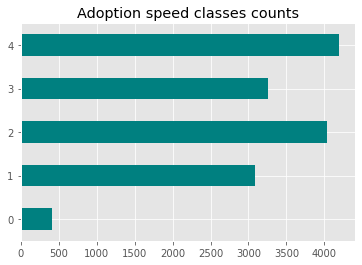

In [ ]:
train['AdoptionSpeed'].value_counts().sort_index().plot(kind='barh', color='teal')
plt.title('Adoption speed classes counts')

In [ ]:
print(f"Rate of pets AdoptionSpeed_0 in train data: {train['AdoptionSpeed_0'].sum() * 100 / train['AdoptionSpeed_0'].shape[0]:.4f}%.")
print(f"Rate of pets AdoptionSpeed_1 in train data: {train['AdoptionSpeed_1'].sum() * 100 / train['AdoptionSpeed_1'].shape[0]:.4f}%.")
print(f"Rate of pets AdoptionSpeed_2 in train data: {train['AdoptionSpeed_2'].sum() * 100 / train['AdoptionSpeed_2'].shape[0]:.4f}%.")
print(f"Rate of pets AdoptionSpeed_3 in train data: {train['AdoptionSpeed_3'].sum() * 100 / train['AdoptionSpeed_3'].shape[0]:.4f}%.")
print(f"Rate of pets AdoptionSpeed_4 in train data: {train['AdoptionSpeed_4'].sum() * 100 / train['AdoptionSpeed_4'].shape[0]:.4f}%.")


Rate of pets AdoptionSpeed_0 in train data: 2.7346%.
Rate of pets AdoptionSpeed_1 in train data: 20.6096%.
Rate of pets AdoptionSpeed_2 in train data: 26.9259%.
Rate of pets AdoptionSpeed_3 in train data: 21.7368%.
Rate of pets AdoptionSpeed_4 in train data: 27.9931%.


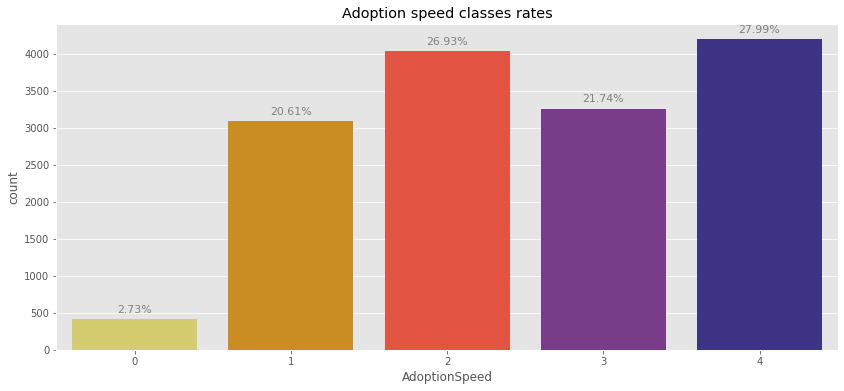

In [ ]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=train, palette = "CMRmap_r");
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Comment: we can see that the adoption rate 

>**2 --> for Pets that were adopted between 8 and 30 days (1st month) after being listed.** and 

>**4 --> for No adoption after 100 days of being listed.** are the majoried classes here.

on the other hand a very small group of pets for class 

>**0 --> for Pets were adopted on the same day after being listed.**


#### **2- let's discover the "Name" feature**

let's see fisrt the most common names.

(-0.5, 1199.5, 999.5, -0.5)

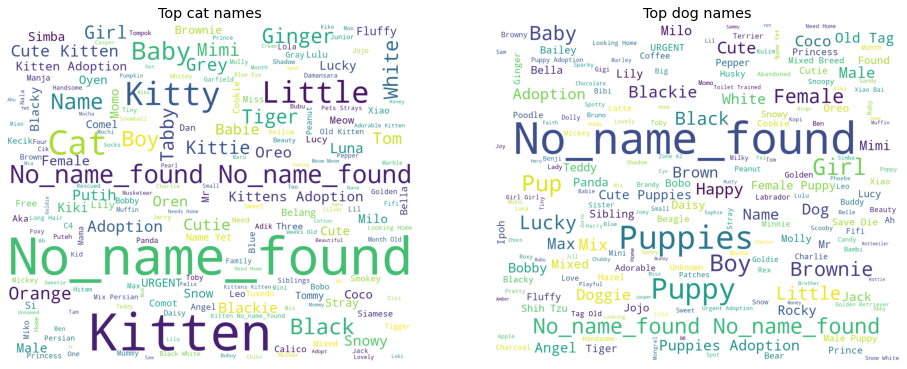

In [ ]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_data.loc[all_data['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_data.loc[all_data['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

there are strange names like White , BLack , mixed.. they could be a really strange names of the pets or some info typed by mistake.

and also there is a lot of pets that have no names , let's check that 

#### **3- let's see if the pet has a name or not does affect the AdoptionSpeed:**

let's see first the percentage of each the pets who have names and the ones who have not for each adoption speed.

**NOTE:**

**No Name = 0 = False = means have name**

**No name = 1 = True = means have no name**

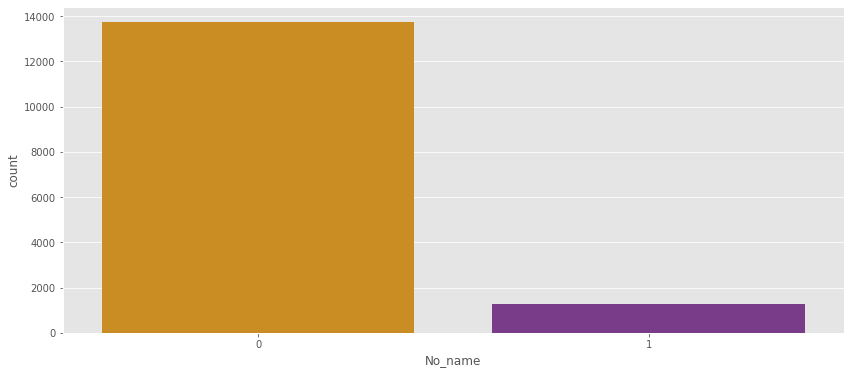

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x="No_name" , data=train, palette = "CMRmap_r")

we can see that most of the listed pets have names = 0

In [ ]:
print(f"Rate of unnamed pets in train data: {train['No_name'].sum() * 100 / train['No_name'].shape[0]:.4f}%.")
print(f"Rate of unnamed pets in test data: {test['No_name'].sum() * 100 / test['No_name'].shape[0]:.4f}%.")

Rate of unnamed pets in train data: 8.3839%.
Rate of unnamed pets in test data: 10.3474%.


about 8% of pets have no name in tha trainig data

we can see it accross the adoption rate

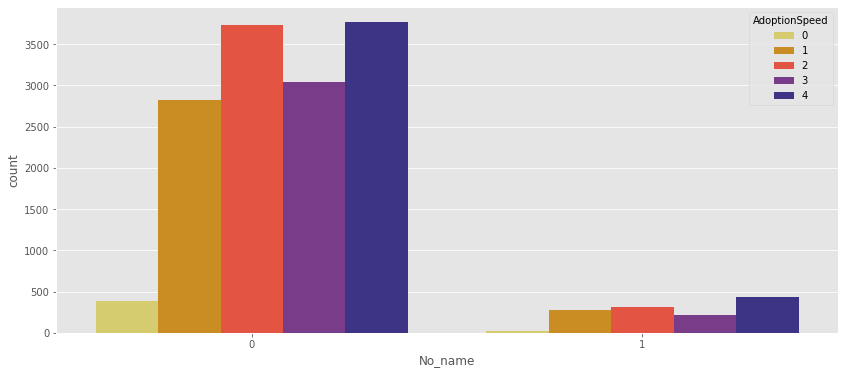

In [ ]:
x, y, hue = "No_name", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]

total = float(len(train))
plt.figure(figsize=(14, 6))
ax=sns.countplot(x=x, hue=hue, data=train, palette = "CMRmap_r")

#for p in ax.patches:
 #    ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
  #       ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
   #      textcoords='offset points') 

In [ ]:
pd.crosstab(train['No_name'], train['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
No_name,,,,,
0,0.027956,0.205227,0.271185,0.221535,0.274097
1,0.020684,0.215593,0.248210,0.171838,0.343675


Less than 10% of pets don't have names in train, and they have a higher possibility of not being adopted.

#### **3- let's see if the Type of pets affect AdoptionSpeed**

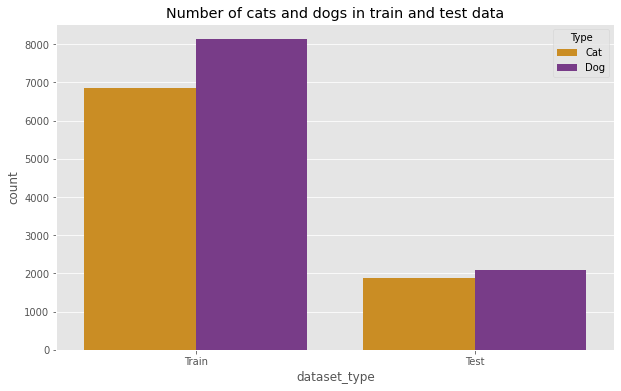

In [ ]:
plt.figure(figsize=(10, 6));
sns.countplot(x='dataset_type', data=all_data, hue='Type', palette = "CMRmap_r");
plt.title('Number of cats and dogs in train and test data');


In [ ]:
pd.crosstab(all_data['dataset_type'], all_data['Type'], normalize='index')

Type,Cat,Dog
dataset_type,,
Test,0.471299,0.528701
Train,0.457614,0.542386


the rate of the dogs in train dataset is higher in both train and test datastes.

let's see it accross the adoptionspeed

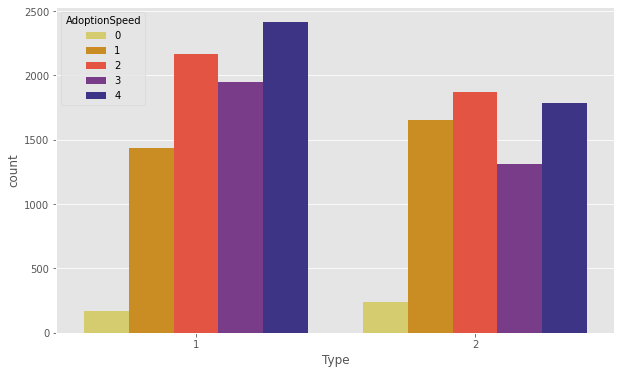

In [ ]:
plt.figure(figsize=(10, 6));
x, y, hue = "Type", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]

sns.countplot(x=x, hue=hue, data = train, palette = "CMRmap_r")

In [ ]:
pd.crosstab(train['Type'], train['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
Type,,,,,
1,0.020905,0.176463,0.266109,0.239670,0.296852
2,0.034980,0.241218,0.272992,0.190934,0.259875


**note:**

>Type= 1-> dog

>Type= 2-> cat


> 0 - Pet was adopted on the same day as it was listed.

>1 - Pet was adopted between 1 and 7 days (1st week) after being listed.

>2 - Pet was adopted between 8 and 30 days (1st month) after being listed.

>3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

>4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

we can see that the cats got adopted at adoptionrate =0,1,2 more than dogs whish means they are being adopted faster that dogs at the early days.

also we can notice that the dogs not being adopted after 100 days with a high rate more than cats.



#### **4- let's see if the Gender of pets affect AdoptionSpeed rate:**

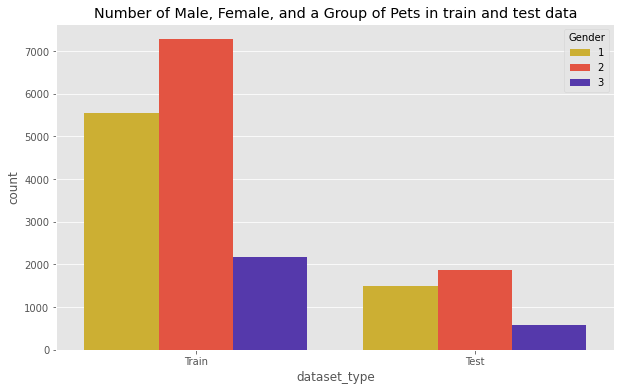

In [ ]:
plt.figure(figsize=(10, 6));
sns.countplot(x='dataset_type', data=all_data, hue='Gender', palette = "CMRmap_r");
plt.title('Number of Male, Female, and a Group of Pets in train and test data');

In [ ]:
pd.crosstab(all_data['dataset_type'], all_data['Gender'], normalize='index')

Gender,1,2,3
dataset_type,,,
Test,0.378651,0.47281,0.148540
Train,0.369239,0.48536,0.145401


we can see that the Female dominates the training dataset and the test datatset. but not with a huge difference with Male.

while there is a Huge difference between Female smaples and Group of pets samles.

let's see if the Gender affects adoption rate.

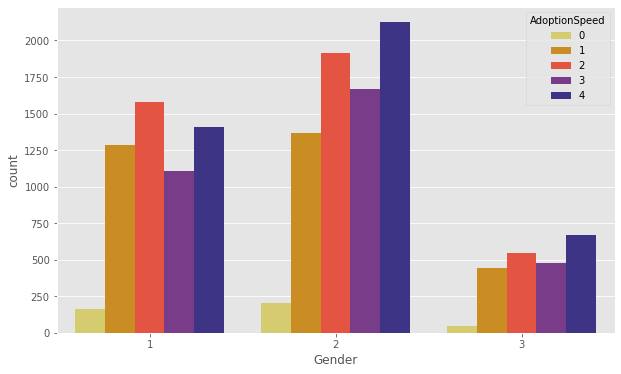

In [ ]:
plt.figure(figsize=(10, 6));
x, y, hue = "Gender", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]

sns.countplot(x=x, hue=hue, data = train, palette = "CMRmap_r")

In [ ]:
pd.crosstab(train['Gender'], train['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
Gender,,,,,
1,0.028902,0.231756,0.285043,0.200325,0.253974
2,0.028034,0.187715,0.262608,0.229628,0.292016
3,0.021101,0.202294,0.251376,0.219725,0.305505


**Note:** 
>Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

> 0 - Pet was adopted on the same day as it was listed.

>1 - Pet was adopted between 1 and 7 days (1st week) after being listed.

>2 - Pet was adopted between 8 and 30 days (1st month) after being listed.

>3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

>4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

**Comments:**

>we can see that the dogs adoption rate for adoption speed =1  is more than cat's adoption rate.

>also cats adoption rate is higher for adoption speed =4  that the dog's adoption rate. that means they are most probabily not being adopted.

>moreover, for group of pets , their adoption rate is high for adoptionspeed =4 more than dogs and cats. which means they are most probabily not being adopted too.



let's see which type of pets presents more in a specific Gender.

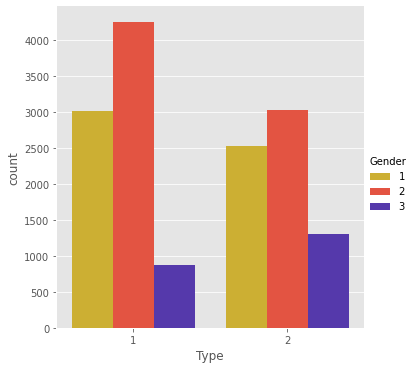

<Figure size 720x432 with 0 Axes>

In [ ]:

sns.factorplot('Type', data=train, kind='count', hue='Gender', palette = "CMRmap_r");
plt.figure(figsize=(10, 6));
plt.subplots_adjust(top=0.8)

plt.suptitle('Count of cats and dogs in train set by gender');


In [ ]:
pd.crosstab(train['Type'], train['Gender'], normalize='index')

Gender,1,2,3
Type,,,
1,0.369528,0.522873,0.107600
2,0.368897,0.440898,0.190206


**Note:**
>>Type=1=Dog
>>
>>Type=2=Cat
>
>> Gender=1=Male
>>
>> Gender=2=Female
>> 
>> Gender=3=Group of Pets

Comments:
>
>we can see in the train data, the the Female Dogs are dominated over the other gender types.

>and for cats the female class too is dominated over the other gender types.


>we can conclude that the female wether the type of th epet dog or cat is dominated.

>while the group of pets is higher when it comes to cats.

>and the when it comes to dogs the male class is higher than cats.

#### **5- let's see if the Age of pets affect AdoptionSpeed:**

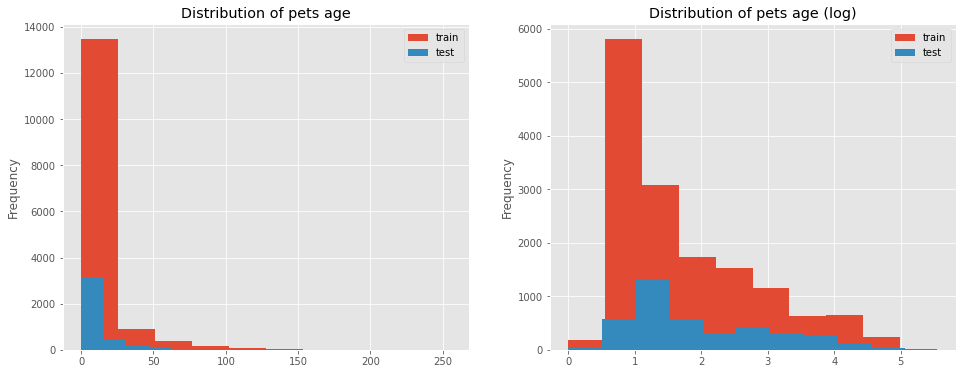

In [ ]:

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of pets age')
train['Age'].plot(kind='hist', label='train')
test['Age'].plot(kind='hist', label='test')
plt.legend()



plt.subplot(1, 2, 2)
plt.title('Distribution of pets age (log)');
np.log1p(train['Age']).plot(kind='hist', label='train');
np.log1p(test['Age']).plot(kind='hist', label='test');
plt.legend();

In [ ]:
train['Age'].value_counts().head(10)

2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
Name: Age, dtype: int64

mot of the pets are young

<Figure size 720x432 with 0 Axes>

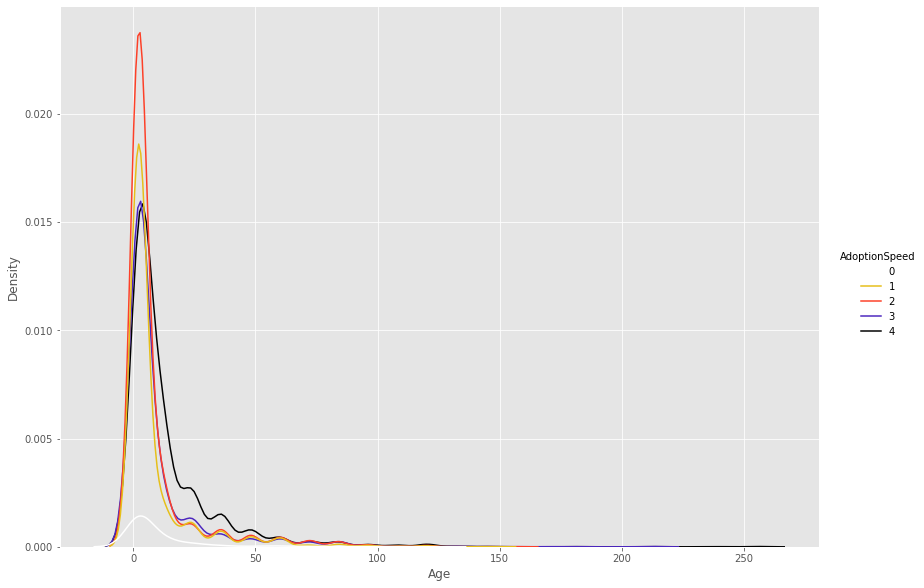

In [ ]:
plt.figure(figsize=(10, 6));
sns.displot(train, x="Age", hue="AdoptionSpeed", palette = "CMRmap_r", kind="kde", height=8.27, aspect=11.7/8.27)

<Figure size 720x432 with 0 Axes>

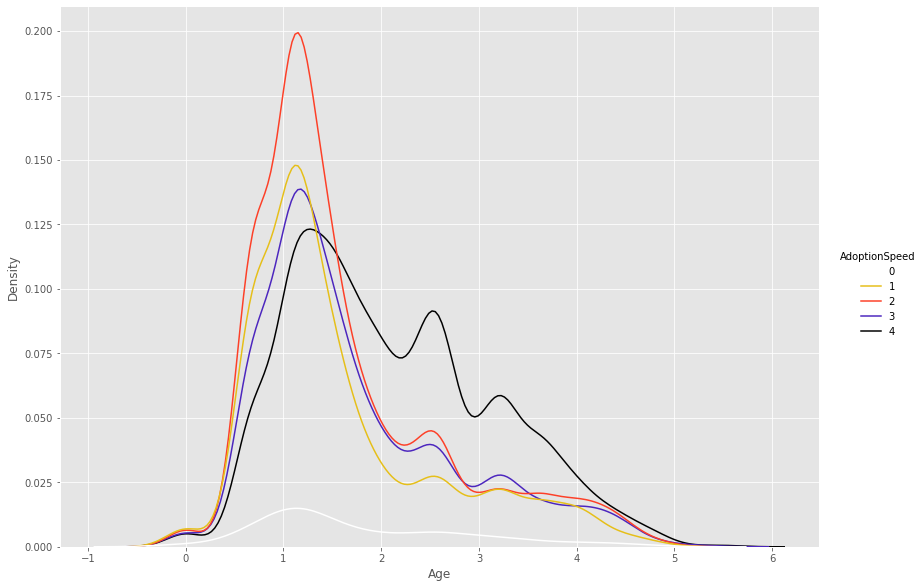

In [ ]:
plt.figure(figsize=(10, 6));
sns.displot(data = train, x=np.log1p(train['Age']), hue="AdoptionSpeed", palette = "CMRmap_r", kind="kde", height=8.27, aspect=11.7/8.27)

we can conclude from this density plot that the younger pets got adopted more than the older ones. so yes the age affects the adoption rate.

#### **6- let's see if the Pure Breed of pets affect AdoptionSpeed:**

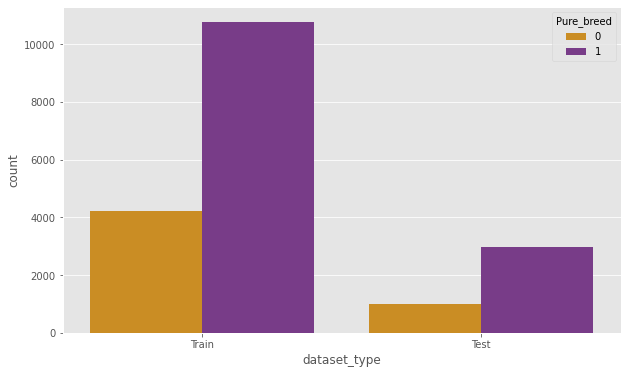

In [ ]:
x, y, hue = "dataset_type", "Pure_breed", 'Pure_breed'
hue_order = ["0", "1"]

plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['Pure_breed'], all_data['dataset_type'], normalize='index')

dataset_type,Test,Train
Pure_breed,,
0,0.191940,0.808060
1,0.216112,0.783888


**Note:**
>>Pure_breed=0=False
>
>>Pure_breed=1=True

**Comments:**

>> we can see that the not pure breed is slightly higher in the train data ove the Pure Breed.
>
>> and we can see that the test dataset the pure breed is slightly higher than the not pure breed.

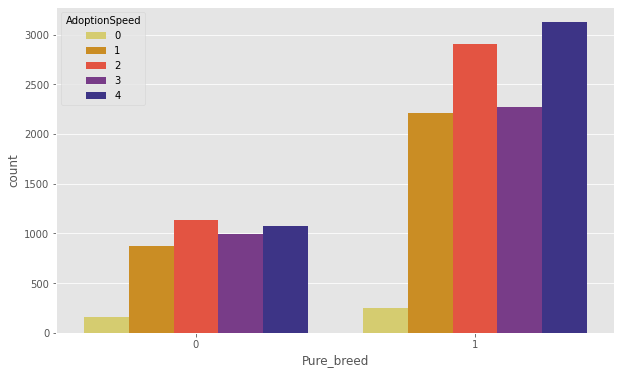

In [ ]:
x, y, hue = "Pure_breed", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=train, palette = "CMRmap_r")

In [ ]:
pd.crosstab(train['Pure_breed'], train['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
Pure_breed,,,,,
0,0.037107,0.207043,0.267785,0.234460,0.253604
1,0.023509,0.205724,0.269838,0.210649,0.290281


Comments:

>>we can see that the not pure breed their adoption rate in early days is low , and satrt getting higher at adoption speed=2, and getting slightly low at the adoption speed =3. same for the pure breed.
>
>> also we noticed that the pure breed adoptionspeed=4 is higher than the not pure breed , which means that the pure breeds are most likely not being adopted as mush as the not pure breed approximitly by 0.04 difference.

let's see how the pure breed affects dogs adoption rate accross the tarin and test sets.

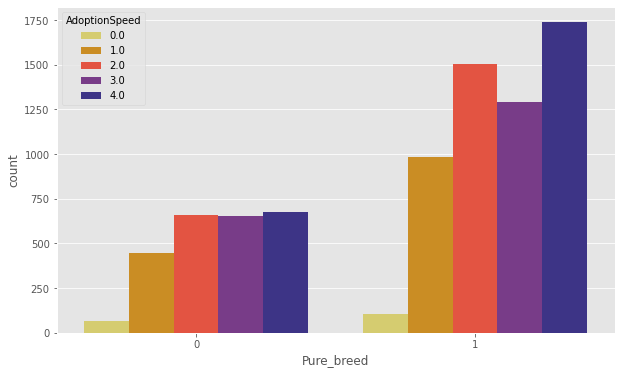

In [ ]:
x, y, hue = "Pure_breed", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Dog"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Dog"]
pd.crosstab(dff['Pure_breed'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Pure_breed,,,,,
0,0.026347,0.179242,0.262675,0.261876,0.269860
1,0.018482,0.175227,0.267638,0.229785,0.308868


**Comments:**

>>we can see that at adoptionrate=2 & 3 the adoption rate is higher for the not pure breed for dogs.
>
>> also the same for pure breed.
>
>> and we noticed that the pure breed not being adopted rate (adoptionrate=4) is higher than the pure breed
>
>> and that means that the if the Dog is from a pure breed or not affects the adoption rate

let's see how the pure breed affects cats adoption rate accross the tarin and test sets.

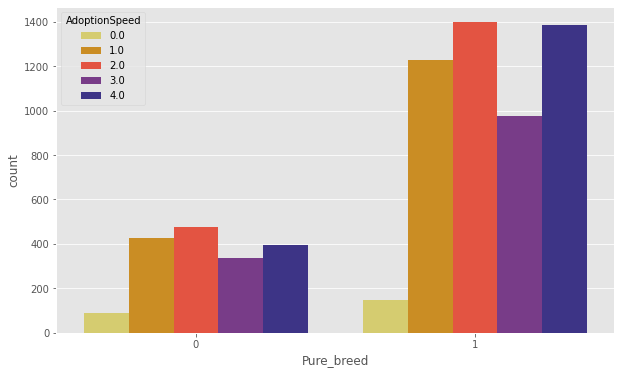

In [ ]:
x, y, hue = "Pure_breed", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Cat"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Cat"]
pd.crosstab(dff['Pure_breed'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Pure_breed,,,,,
0,0.052723,0.247393,0.275203,0.194670,0.230012
1,0.029017,0.239143,0.272249,0.189679,0.269912


**Comments:**

>>we can see that at adoptionrate=1 & 2 the adoption rate is higher for the not pure breed for dogs.
>
>> also the same for pure breed.
>
>> and we noticed that the pure breed not being adopted rate (adoptionrate=4) is slightly higher than the pure breed
>
>> and that means that the if the Cat is from a pure breed or not affects the adoption rate.

#### **7- let's see if the Color of pets affect AdoptionSpeed:**

let's see it across cats and dogs.

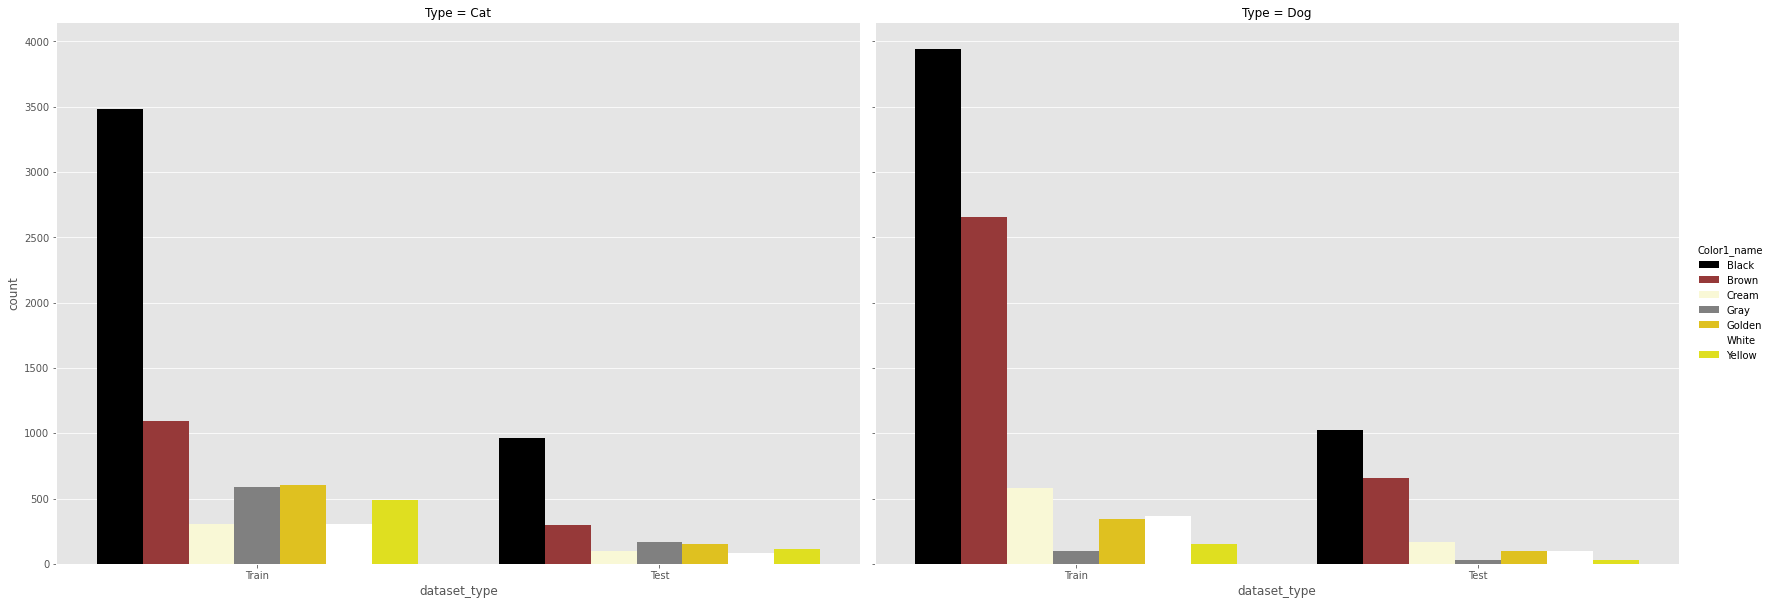

<Figure size 720x432 with 0 Axes>

In [ ]:
sns.factorplot('dataset_type', col='Type', data=all_data, kind='count', hue='Color1_name', palette=['Black', 'Brown', '#FFFDD0', 'Gray', 'Gold', 'White', 'Yellow'], height=8.27, aspect=11.7/8.27);
plt.figure(figsize=(10, 6));
plt.subplots_adjust(top=0.8)
plt.suptitle('Counts of pets in datasets by main color');

for cats

In [ ]:
dff=all_data[all_data["Type"]=="Cat"]
pd.crosstab(dff['Color1_name'], dff['dataset_type'], normalize='index')

dataset_type,Test,Train
Color1_name,,
Black,0.217303,0.782697
Brown,0.213410,0.786590
Cream,0.238095,0.761905
Golden,0.198675,0.801325
Gray,0.222955,0.777045
White,0.218509,0.781491
Yellow,0.184874,0.815126


In [ ]:
pd.crosstab(dff['Color1_name'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Color1_name,,,,,
Black,0.030434,0.230261,0.267873,0.191789,0.279644
Brown,0.053162,0.245646,0.259395,0.196150,0.245646
Cream,0.049342,0.296053,0.292763,0.174342,0.187500
Golden,0.024793,0.251240,0.315702,0.180165,0.228099
Gray,0.045840,0.229202,0.281834,0.200340,0.242784
White,0.019737,0.299342,0.302632,0.134868,0.243421
Yellow,0.026804,0.241237,0.245361,0.220619,0.265979


**Comments:**

>>we can see that the Yellow and Golden colors are the highest in the training set.
>
>> while Cream and Gray colors are the highest in the test set.

>
>> and the most color of not being adopted is the black
>
>>




for dogs

In [ ]:
dff=all_data[all_data["Type"]=="Dog"]
pd.crosstab(dff['Color1_name'], dff['dataset_type'], normalize='index')

dataset_type,Test,Train
Color1_name,,
Black,0.205799,0.794201
Brown,0.197404,0.802596
Cream,0.223561,0.776439
Golden,0.226244,0.773756
Gray,0.240000,0.760000
White,0.214286,0.785714
Yellow,0.158192,0.841808


In [ ]:
pd.crosstab(dff['Color1_name'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Color1_name,,,,,
Black,0.016988,0.176471,0.279665,0.244675,0.282201
Brown,0.022941,0.158330,0.253103,0.240692,0.324934
Cream,0.032759,0.224138,0.256897,0.227586,0.258621
Golden,0.040936,0.172515,0.274854,0.219298,0.292398
Gray,0.021053,0.221053,0.305263,0.157895,0.294737
White,0.019284,0.234160,0.247934,0.231405,0.267218
Yellow,0.000000,0.154362,0.174497,0.255034,0.416107


**Comments:**

>>we can see that the Yellow and Brown colors are the highest in the training set.
>
>> while Gray , Golden, and Cream colors are the highest in the test set.

>
>> and the most color of not being adopted is the Yellow, and Brown.
>
>>




#### **8- let's see if the MaturitySize of pets affect AdoptionSpeed:**

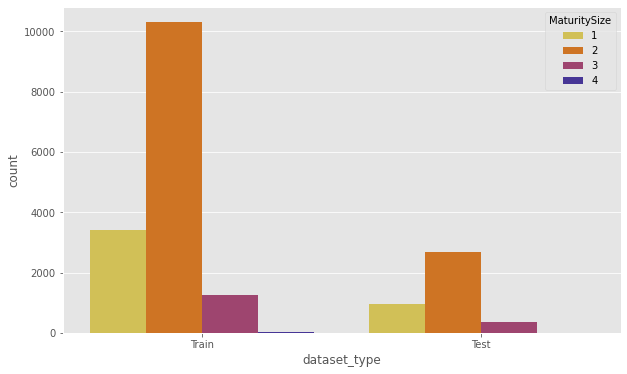

In [ ]:
x, y, hue = "dataset_type", "MaturitySize", "MaturitySize"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['MaturitySize'], all_data['dataset_type'], normalize='index')

dataset_type,Test,Train
MaturitySize,,
1,0.218822,0.781178
2,0.206025,0.793975
3,0.214464,0.785536
4,0.083333,0.916667


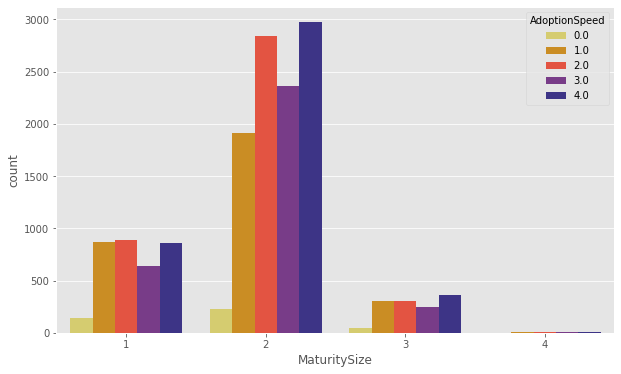

In [ ]:
x, y, hue = "MaturitySize", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['MaturitySize'], all_data['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
MaturitySize,,,,,
1,0.040943,0.256259,0.260383,0.188807,0.253608
2,0.021931,0.185250,0.275303,0.229015,0.288501
3,0.034127,0.241270,0.242063,0.196825,0.285714
4,0.060606,0.212121,0.333333,0.303030,0.090909


**Note:**

>>MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = ExtraLarge, 0 = Not Specified)

**Comments:**

>> we can notice that the medium pets adoptionrate=4 is the highest , and below it the large maturity size of not being adopted.
>
>> also we can notice that the extra large pets adoptionrate=2 & 3 is the highest over the rest for the maturity sizes

for dogs

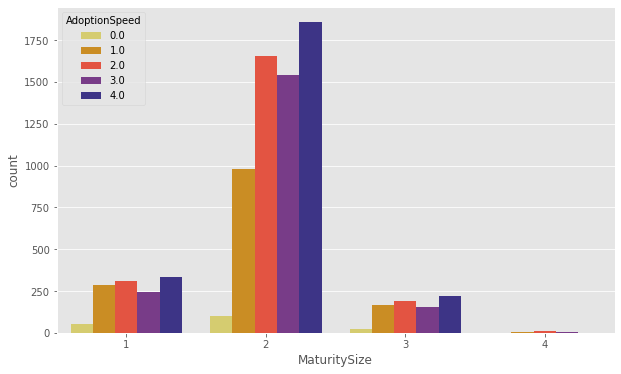

In [ ]:
x, y, hue = "MaturitySize", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Dog"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Dog"]
pd.crosstab(dff['MaturitySize'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
MaturitySize,,,,,
1,0.040883,0.231398,0.253475,0.200327,0.273917
2,0.016158,0.159621,0.269626,0.251510,0.303085
3,0.027632,0.221053,0.252632,0.206579,0.292105
4,0.000000,0.272727,0.454545,0.272727,0.000000


**Note:**

>>MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = ExtraLarge, 0 = Not Specified)

**Comments:**

>> we can notice that the medium pets adoptionrate=4 is the highest , and below it the large maturity size for not being adopted.
>
>> also we can notice that the extra large pets adoptionrate=2 is the highest over the rest of the maturity sizes

for cats

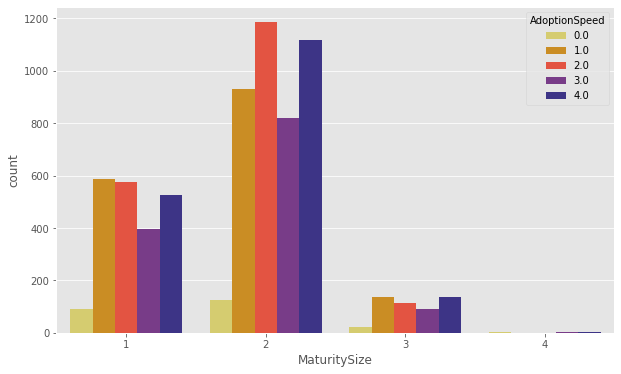

In [ ]:
x, y, hue = "MaturitySize", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Cat"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Cat"]
pd.crosstab(dff['MaturitySize'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
MaturitySize,,,,,
1,0.040976,0.270258,0.264273,0.182320,0.242173
2,0.030397,0.222834,0.283629,0.196027,0.267113
3,0.044000,0.272000,0.226000,0.182000,0.276000
4,0.181818,0.090909,0.090909,0.363636,0.272727


**Note:**

>>MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = ExtraLarge, 0 = Not Specified)

**Comments:**

>> we can notice that the large and extra large sizes of pets their adoptionrate=4 is the highest of not being adopted.
>
>> also we can notice that the extra large pets adoptionrate= 3 is the highest over the rest of the maturity sizes
>
>>small, medium, and large sizes, got adopted with good rates

#### **9- let's see if the FurLength of pets affect AdoptionSpeed:**

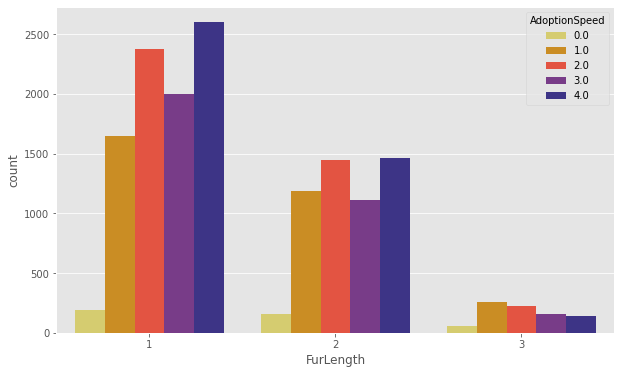

In [ ]:
x, y, hue = "FurLength", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['FurLength'], all_data['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
FurLength,,,,,
1,0.022025,0.187216,0.269301,0.226385,0.295073
2,0.029845,0.221414,0.269353,0.207237,0.272151
3,0.067961,0.308252,0.268204,0.186893,0.168689


**Note:**

we can see that 

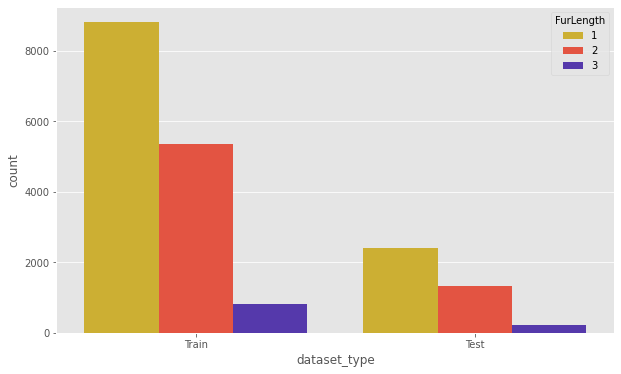

In [ ]:
x, y, hue = "dataset_type", "FurLength", "FurLength"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['FurLength'], all_data['dataset_type'], normalize='index')

dataset_type,Test,Train
FurLength,,
1,0.214693,0.785307
2,0.199731,0.800269
3,0.215238,0.784762


Note: Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

the short and long found more in test set

the medium found a littel bit more in the train set.

for dogs

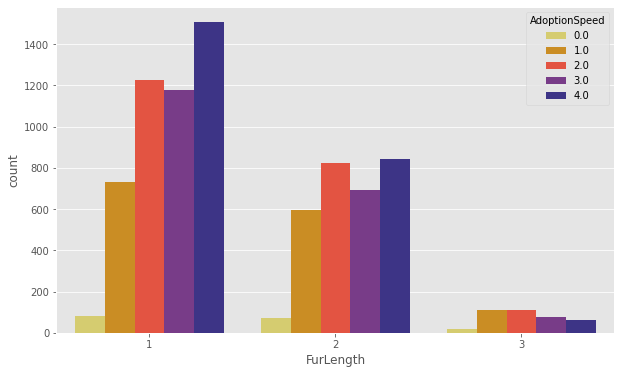

In [ ]:
x, y, hue = "FurLength", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Dog"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Dog"]
pd.crosstab(dff['FurLength'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
FurLength,,,,,
1,0.016935,0.154530,0.259949,0.249577,0.319009
2,0.023778,0.196499,0.272457,0.228534,0.278732
3,0.047368,0.289474,0.292105,0.205263,0.165789


short furlength for dogs have a higher rate of not being adopted. which means they god adopted after a long time or not being adopted at all.

long furlength for dogs have a low rate of not being adopted. which means they got adopted faster.



for cats

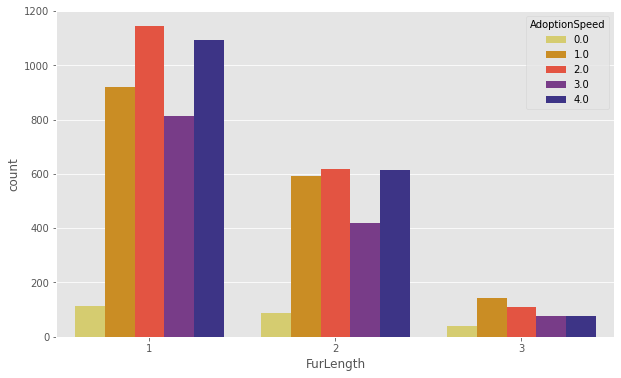

In [ ]:
x, y, hue = "FurLength", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Cat"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Cat"]
pd.crosstab(dff['FurLength'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
FurLength,,,,,
1,0.027914,0.225024,0.280118,0.199559,0.267385
2,0.037720,0.253751,0.265324,0.179597,0.263609
3,0.085586,0.324324,0.247748,0.171171,0.171171


short furlength for cats have a higher rate of being adopted at adoptionspeed=2. 

long furlength for cats have a low rate of not being adopted. which means they got adopted faster.



#### **10- let's see if the pet got Vacinnated affects AdoptionSpeed:**

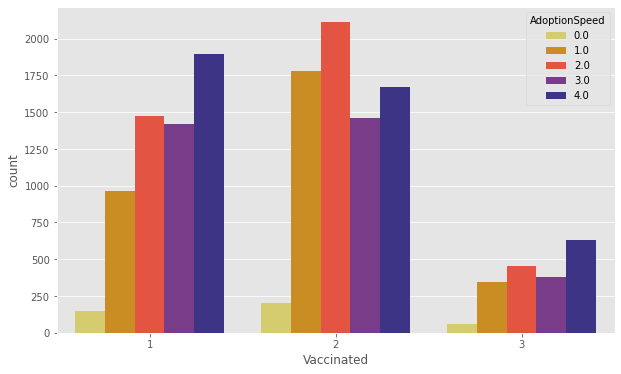

In [ ]:
x, y, hue = "Vaccinated", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['Vaccinated'], all_data['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Vaccinated,,,,,
1,0.024754,0.163615,0.249746,0.240590,0.321295
2,0.028504,0.245883,0.292237,0.201882,0.231493
3,0.031049,0.186296,0.241970,0.203961,0.336724


Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)


vaccinated pets: have a high rate in adoptionspeed=4 which means that if the pet got vaccinated mot likely not being adopted. so that indicate it doesnot affect adoption rate. 
also the same for not sure.



#### **11- let's see if the Dewormed of pets affect AdoptionSpeed:**

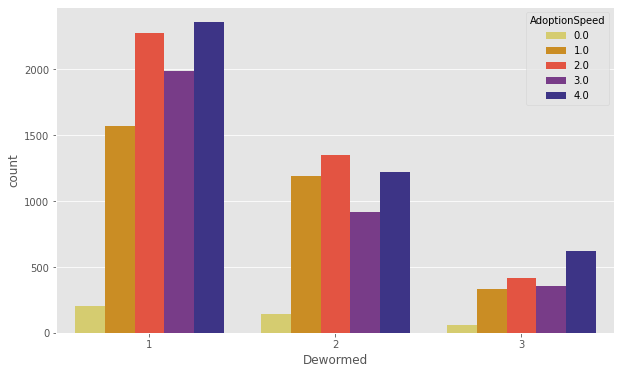

In [ ]:
x, y, hue = "Dewormed", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['Dewormed'], all_data['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Dewormed,,,,,
1,0.024413,0.187210,0.270692,0.236751,0.280934
2,0.030322,0.246729,0.279751,0.189823,0.253375
3,0.033127,0.185289,0.234138,0.200449,0.346996



Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)


Dewormed pets: have a high percentage in adoptionspeed=4 
below it for adoptionrate=2 a high percentage also for being adopted
, so that indicate it doesnot affect adoption rate that much.
the same for not sure. 

and for not being dewormed, the adoption rate is the highest at adoptionrate=2, which means the pets got adopted in the early weeks after being listed.





#### **12- let's see if the Sterilized of pets affect AdoptionSpeed:**

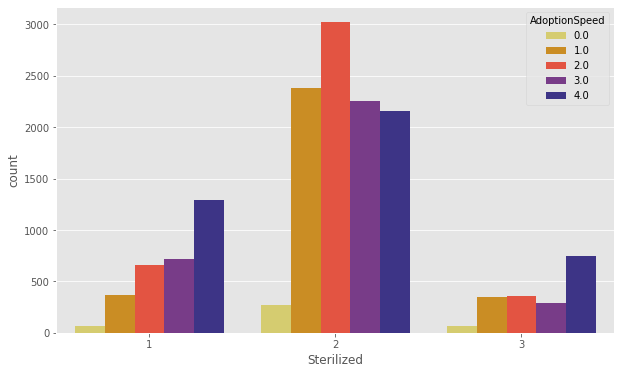

In [ ]:
x, y, hue = "Sterilized", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['Sterilized'], all_data['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Sterilized,,,,,
1,0.022573,0.117381,0.211545,0.232183,0.416317
2,0.026794,0.235983,0.299891,0.223380,0.213953
3,0.038567,0.191736,0.197796,0.158678,0.413223


Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

if the pet got spayed it most likely not being adopted by very high percentage.
same for not sure.

and if the pet not got spayed most liekly being adopted in the early days after being listed.





#### **13- let's see if the Health of pets affect AdoptionSpeed:**

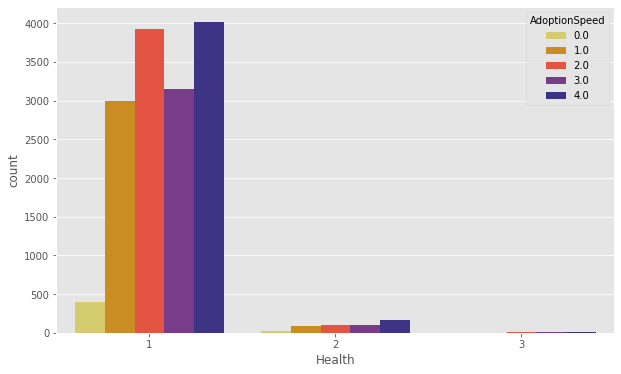

In [ ]:
x, y, hue = "Health", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['Health'], all_data['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Health,,,,,
1,0.027076,0.207142,0.271101,0.217571,0.277110
2,0.035343,0.185031,0.220374,0.203742,0.355509
3,0.029412,0.058824,0.176471,0.323529,0.411765


Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

pets with serious injury most likely not being adopted. or adopted after a long time.

pets with a good health the highest percentage at aoptionspeed=4, which means that the pets witha good health may also not being a dopted. or the good health  itself does not affect adoption rate that much.

pets with minor injury the highest percentage at aoptionspeed=4, which means that the pets witha minor health may also not being a dopted. or git adopted after a longtime after being listed.

Another conclusion from the perivous 4 analysis poins , that "not sure"  being acted like the worest case across the different features, and follows the same distribution for the worest case most of the times.

#### **14- let's see see tha last four analysis points, health vaccinated dewormed , and sterilized all together and see how they affect  AdoptionSpeed:**



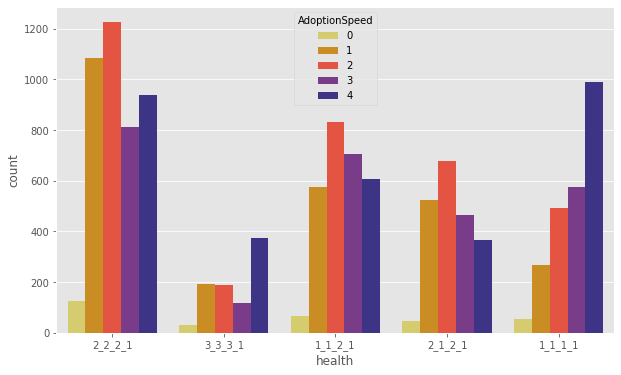

In [ ]:
x, y, hue = "health", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=train.loc[train['health'].isin(list(train.health.value_counts().index[:5]))], palette = "CMRmap_r")

In [ ]:
dff=train.loc[train['health'].isin(list(train.health.value_counts().index[:5]))]
pd.crosstab(dff['health'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
health,,,,,
1_1_1_1,0.022297,0.113168,0.206984,0.241902,0.415650
1_1_2_1,0.024408,0.206030,0.298636,0.253051,0.217875
2_1_2_1,0.022585,0.252283,0.325324,0.223931,0.175877
2_2_2_1,0.030317,0.259012,0.292433,0.193841,0.224397
3_3_3_1,0.036384,0.210584,0.207277,0.131202,0.414553


**Note:**

>>health=1, vaccinated=1, dewormed=1 , and sterilized=1
>
>>health=1, vaccinated=1, dewormed=2 , and sterilized=1
>
>>health=2, vaccinated=1, dewormed=2 , and sterilized=1
>
>>health=2, vaccinated=2, dewormed=2 , and sterilized=1
>
>>health=3, vaccinated=3, dewormed=3 , and sterilized=1

**comments:**

1_1_1_1 and 3_3_3_1 affects adoption rate badly

1_1_2_1 , 2_1_2_1 , and  2_2_2_1 affects adoption rate very well.

#### **14- let's see if Free Fee of pets affect AdoptionSpeed:**

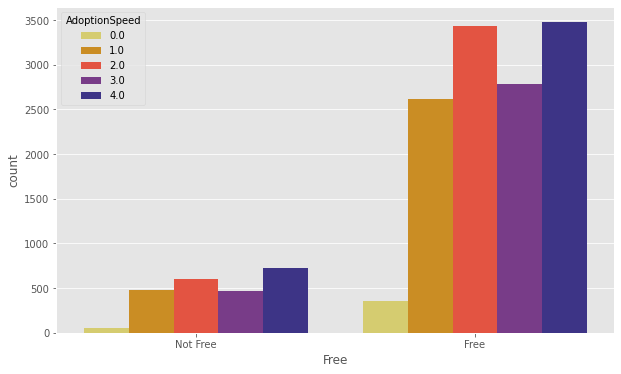

In [ ]:
x, y, hue = "Free", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['Free'], all_data['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Free,,,,,
Free,0.028192,0.206191,0.270868,0.220248,0.274501
Not Free,0.022747,0.205579,0.260515,0.201717,0.309442


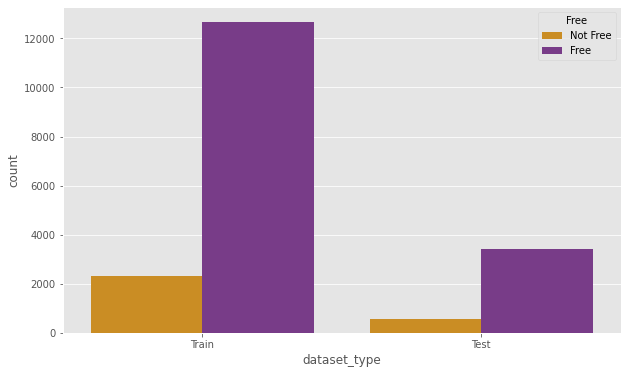

In [ ]:
x, y, hue = "dataset_type", "Free", "Free"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data, palette = "CMRmap_r")

In [ ]:
pd.crosstab(all_data['Free'], all_data['dataset_type'], normalize='index')

dataset_type,Test,Train
Free,,
Free,0.211519,0.788481
Not Free,0.197935,0.802065


free and not free presents in both training and test set in similar percentages

for dogs:

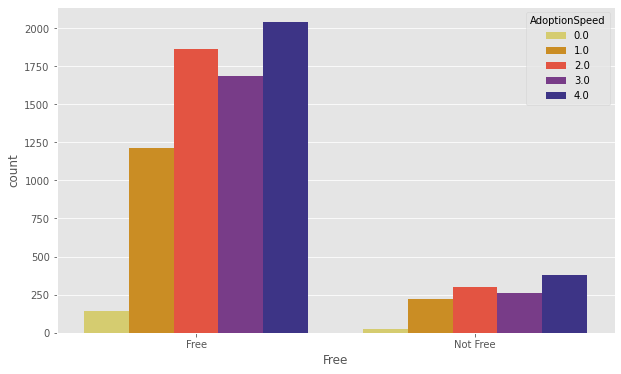

In [ ]:
x, y, hue = "Free", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Dog"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Dog"]
pd.crosstab(dff['Free'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Free,,,,,
Free,0.020458,0.174471,0.268693,0.242760,0.293618
Not Free,0.023510,0.188077,0.251050,0.221662,0.315701


not free affects adoption rate badly

for cats:

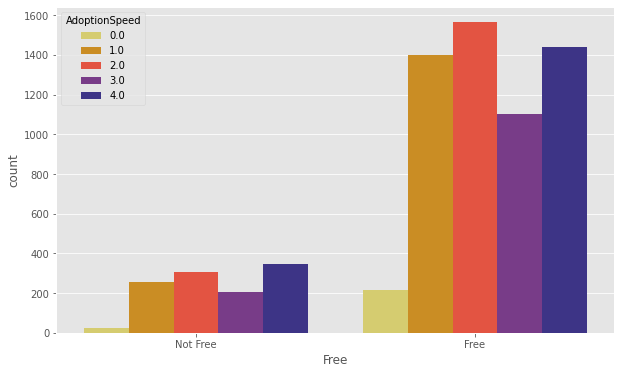

In [ ]:
x, y, hue = "Free", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(10, 6));
sns.countplot(x=x, hue=hue, data=all_data[all_data["Type"]=="Cat"], palette = "CMRmap_r")

In [ ]:
dff=all_data[all_data["Type"]=="Cat"]
pd.crosstab(dff['Free'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Free,,,,,
Free,0.037574,0.244670,0.273506,0.19294,0.251311
Not Free,0.021949,0.223881,0.270413,0.18086,0.302897


not free affects adoption rate badly

<Figure size 1080x432 with 0 Axes>

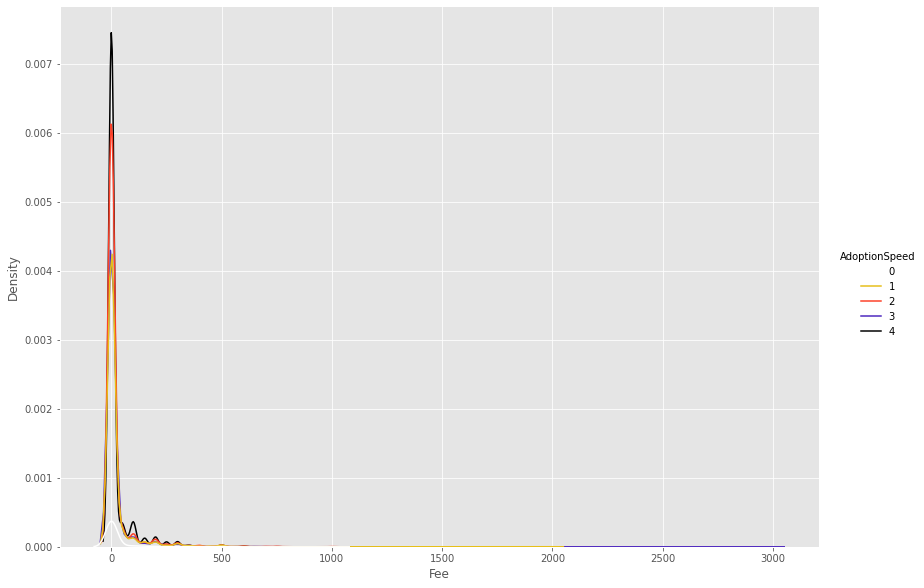

In [ ]:
plt.figure(figsize=(15, 6))
sns.displot(train, x="Fee", hue="AdoptionSpeed", palette = "CMRmap_r", kind="kde", height=8.27, aspect=11.7/8.27)

<Figure size 720x432 with 0 Axes>

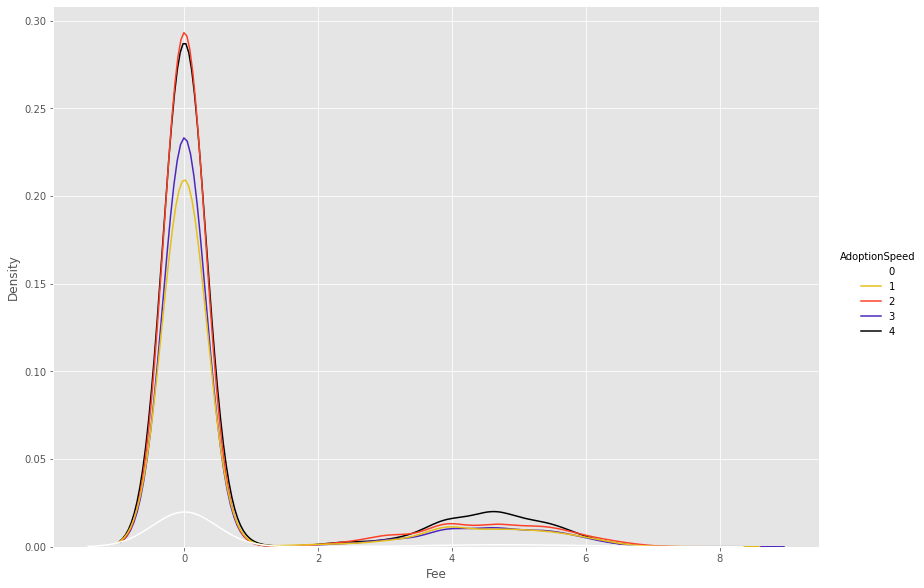

In [ ]:
plt.figure(figsize=(10, 6));
sns.displot(data = train, x=np.log1p(train['Fee']), hue="AdoptionSpeed", palette = "CMRmap_r", kind="kde", height=8.27, aspect=11.7/8.27)

most of the pets are for free

<Figure size 720x432 with 0 Axes>

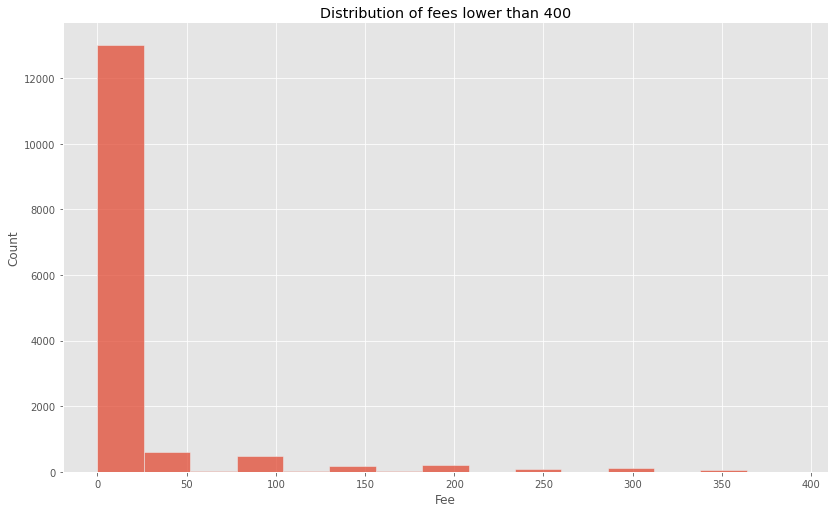

In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(train[train['Fee'] < 400], x="Fee", palette = "CMRmap_r", kind="hist", height=7, aspect=11.7/7)
plt.title('Distribution of fees lower than 400');

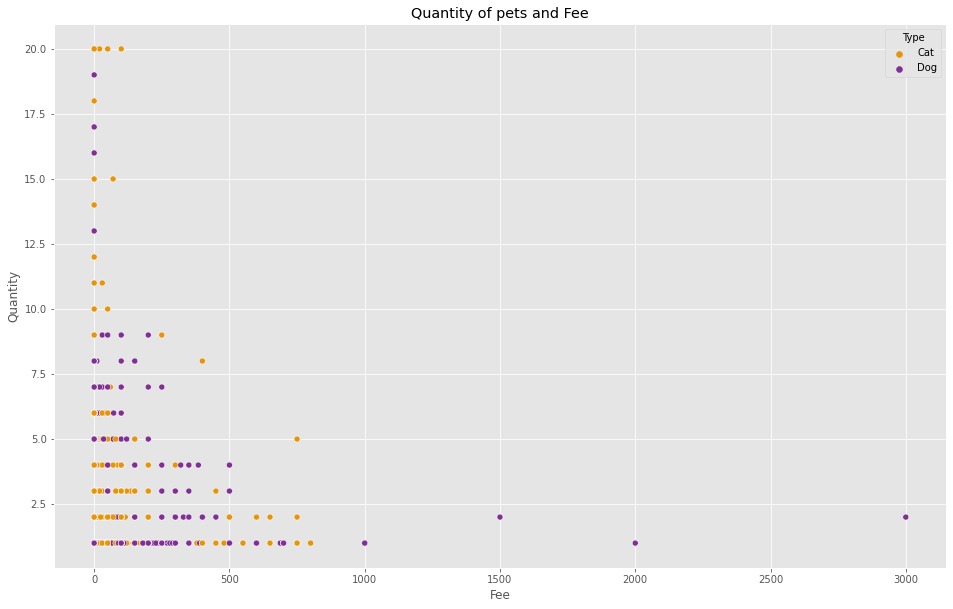

In [ ]:
plt.figure(figsize=(16, 10));
sns.scatterplot(x="Fee", y="Quantity", hue="Type",data=all_data, palette = "CMRmap_r");
plt.title('Quantity of pets and Fee');

as the quantity increase the fee decreased , as the quantity decreased the fee increase 

but this relation is weak.

#### **15- let's see if the RescuerID of pets affect AdoptionSpeed:**

In [ ]:
all_data['RescuerID'].value_counts().head()

fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
62a25cadb85658be5275bd54a3b8c76d    162
Name: RescuerID, dtype: int64

In [ ]:
all_data['RescuerID']

0       8480853f516546f6cf33aa88cd76c379
1       3082c7125d8fb66f7dd4bff4192c8b14
2       fa90fa5b1ee11c86938398b60abc32cb
3       9238e4f44c71a75282e62f7136c6b240
4       95481e953f8aed9ec3d16fc4509537e8
                      ...               
3967    18ec8ca4486bc2760de0bd5390cee30c
3968    d83be5f5e2d04e24d7376e99eafd8708
3969    30aa45fdbe45e39d5614ef583b569073
3970    087903c2819a6297519c93d962b488d5
3971    041876679ae0261e3ee4aefe9e66316f
Name: RescuerID, Length: 18965, dtype: object

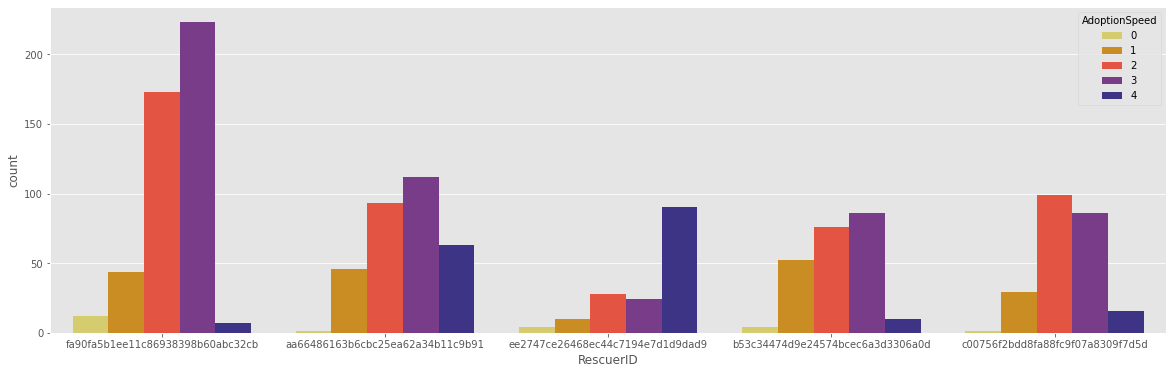

In [ ]:
x, y, hue = "RescuerID", "AdoptionSpeed", "AdoptionSpeed"
hue_order = ["0", "1"]
plt.figure(figsize=(20, 6));
sns.countplot(x=x, hue=hue, data=train.loc[train['RescuerID'].isin(list(train.RescuerID.value_counts().index[:5]))], palette = "CMRmap_r")

In [ ]:
dff=train.loc[train['RescuerID'].isin(list(train.RescuerID.value_counts().index[:5]))]
pd.crosstab(dff['RescuerID'], dff['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
RescuerID,,,,,
aa66486163b6cbc25ea62a34b11c9b91,0.003175,0.146032,0.295238,0.355556,0.200000
b53c34474d9e24574bcec6a3d3306a0d,0.017544,0.228070,0.333333,0.377193,0.043860
c00756f2bdd8fa88fc9f07a8309f7d5d,0.004329,0.125541,0.428571,0.372294,0.069264
ee2747ce26468ec44c7194e7d1d9dad9,0.025641,0.064103,0.179487,0.153846,0.576923
fa90fa5b1ee11c86938398b60abc32cb,0.026144,0.095861,0.376906,0.485839,0.015251


we can see that there is some rescueres like the second,third, and fifth rescures affect the adoption rate very well.

the fourth affects the adoption rate badly 

and the first doesnot affect adoption rate that much

